In [166]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *
from plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 10
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

#initialization (system configurations and parameters)
system = system(N, Nphi,0,True)

N_phi= 17 flux quanta for N_e= 10 electrons
========Initializing possible states in spherical geometry========
completed in 0.08341717720031738 seconds
N = 10 electrons
Nphi = 17 flux quanta

========Constructing total angular momentum matrix========
 
completed in 1.4305419921875 seconds


## Pseudopotential and Hamiltonian Construction

In [168]:
#Coulomb pseudopotentials
pp = haldane_pseudopotential(l = system.Q, 
                             LLn = 1,
                             width = 0,
                             custom = None,
                             interaction = True)

========Initializing two-body pseudopotential========
completed in 0.15758013725280762 seconds
pseudopotential: [0.65631518 0.45657993 0.51343234 0.36249587 0.30756719 0.27523158
 0.25330309 0.23734561 0.2252425  0.21582701 0.2083948  0.20249362
 0.19782052 0.19416682 0.19138684 0.18937929 0.18807584 0.18743423]  with finite width: 0

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matri

In [169]:
#trial pseudopotential according to Greiter et al
trial_pp=np.array([0,1,0,1])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(l = system.Q, 
                             LLn = 1,
                             width = 0,
                             custom = trial_pp,
                             interaction = True)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in  24.850526809692383 seconds



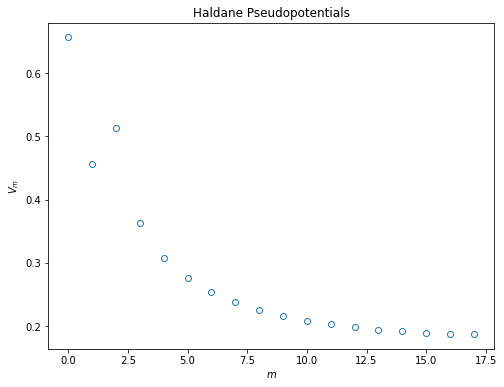

In [170]:
plt.subplots(figsize=(8,6))
plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')

plt.show()

========Constructing Hamiltonian of size 1514 x 1514 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.019815059445178 %
Working on interaction matrix: 10.039630118890356 %
Working on interaction matrix: 15.059445178335535 %
Working on interaction matrix: 20.079260237780712 %
Working on interaction matrix: 25.09907529722589 %
Working on interaction matrix: 30.11889035667107 %
Working on interaction matrix: 35.13870541611625 %
Working on interaction matrix: 40.158520475561424 %
Working on interaction matrix: 45.1783355350066 %
Working on interaction matrix: 50.19815059445178 %
Working on interaction matrix: 55.21796565389696 %
Working on interaction matrix: 60.23778071334214 %
Working on interaction matrix: 65.25759577278731 %
Working on interaction matrix: 70.2774108322325 %
Working on interaction matrix: 75.29722589167768 %
Working on interaction matrix: 80.31704095112285 %
Working on interaction matrix: 85.33685601056803 %
Working on interaction matrix: 9

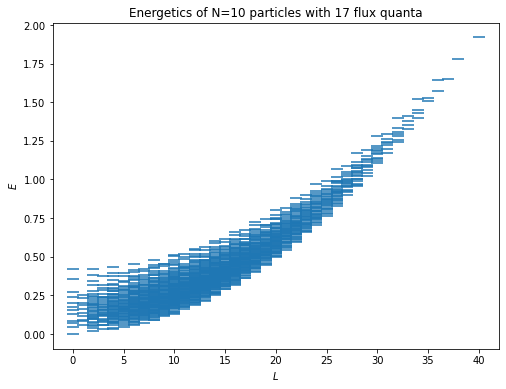

In [171]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
L2=system.L2.A

#diagonalize for eigenstates for wf overlap
energies, eigenstates=LA.eigh(hamil)

plot_L2_spectrum(hamil,L2,title=f'Energetics of N={N} particles with {Nphi} flux quanta',figsize=(8,6),sorted=False, lim=50)

In [172]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

overlap_Vectors(trial_eigenstates[:,0],eigenstates[:,0])

========Constructing Hamiltonian of size 1514 x 1514 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.019815059445178 %
Working on interaction matrix: 10.039630118890356 %
Working on interaction matrix: 15.059445178335535 %
Working on interaction matrix: 20.079260237780712 %
Working on interaction matrix: 25.09907529722589 %
Working on interaction matrix: 30.11889035667107 %
Working on interaction matrix: 35.13870541611625 %
Working on interaction matrix: 40.158520475561424 %
Working on interaction matrix: 45.1783355350066 %
Working on interaction matrix: 50.19815059445178 %
Working on interaction matrix: 55.21796565389696 %
Working on interaction matrix: 60.23778071334214 %
Working on interaction matrix: 65.25759577278731 %
Working on interaction matrix: 70.2774108322325 %
Working on interaction matrix: 75.29722589167768 %
Working on interaction matrix: 80.31704095112285 %
Working on interaction matrix: 85.33685601056803 %
Working on interaction matrix: 9

0.8350725707367443

## Finite Width

In [100]:
width = np.arange(0,10,1)
width[0] = 0.1
overlap=[]
vk1=[]
vk2=[]
vk3=[]

for w in width:
    # finite width of Coulomb system
    test_pp = haldane_pseudopotential(system.Q, LLn = 1, width=w,custom=None, interaction=True)
    vk1.append(test_pp.V[1])
    vk2.append(test_pp.V[2])
    vk3.append(test_pp.V[3])
    
    test_hamiltonian = spherical_system(system, test_pp.pp_matrix)
    test_hamil=test_hamiltonian.h.A
    L2=system.L2.A

    test_energies,test_eigenstates=LA.eigh(test_hamil)

    overlap.append(overlap_Vectors(test_eigenstates[:,0],trial_eigenstates[:,0]))


========Initializing two-body pseudopotential========
completed in 0.09235000610351562 seconds
pseudopotential: [0.6709531  0.46953604 0.53437641 0.37840173 0.32265881 0.29038978
 0.26894893 0.25376199 0.24266378 0.23447598 0.22850323 0.22431736
 0.22165362 0.22035748]  with finite width: 0

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 7.142857142857142 %
Working on interaction matrix: 14.285714285714285 %
Working on interaction matrix: 21.428571428571427 %
Working on interaction matrix: 28.57142857142857 %
Working on interaction matrix: 35.714285714285715 %
Working on interaction matrix: 42.857142857142854 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 57.14285714285714 %
Working on interaction matrix: 64.28571428571429 %
Working on interaction matrix: 71.42857142857143 %
Working on interaction matrix: 78.57142857142857 %
Working on interaction matrix: 85.71428571428571 %
Working on interact

In [91]:
overlap

[0.9621791217924153,
 0.9621791217924124,
 0.962179121792414,
 0.9621791217924124,
 0.962179121792414,
 0.9621791217924129,
 0.9621791217924145,
 0.962179121792412,
 0.9621791217924132,
 0.9621791217924148]

========Initializing two-body pseudopotential========
completed in 0.0845937728881836 seconds
pseudopotential: [1.6472814  1.29822968 1.25897285 1.01356453 0.87116465 0.77261574
 0.69991159 0.64462479 0.60209494 0.56950021 0.54504123 0.52754472
 0.51625437 0.51071598]  with finite width: 0.0001 vk: 0.3922116034263537

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 7.142857142857142 %
Working on interaction matrix: 14.285714285714285 %
Working on interaction matrix: 21.428571428571427 %
Working on interaction matrix: 28.57142857142857 %
Working on interaction matrix: 35.714285714285715 %
Working on interaction matrix: 42.857142857142854 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 57.14285714285714 %
Working on interaction matrix: 64.28571428571429 %
Working on interaction matrix: 71.42857142857143 %
Working on interaction matrix: 78.57142857142857 %
Working on interaction matrix: 85.714285714

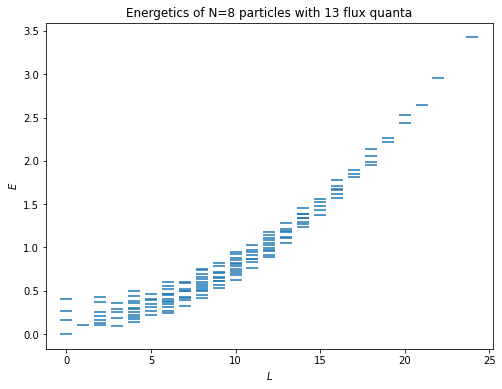

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9442541130721935


0.9442541130721935

In [57]:
d=0.0001
test_pp = haldane_pseudopotential(system.Q, LLn = 1, width=d)

test_hamiltonian = spherical_system(system, test_pp.pp_matrix)
test_hamil=test_hamiltonian.h.A
L2=system.L2.A

test_energies,test_eigenstates=LA.eigh(test_hamil)

plot_L2_spectrum(test_hamil,L2,title=f'Energetics of N={N} particles with {Nphi} flux quanta',figsize=(8,6),sorted=False, lim=50)

overlap_Vectors(test_eigenstates[:,0],trial_eigenstates[:,0])

## Gaussian White Noise (Disordered 5/2)

In [4]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.0001

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)
noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

L,ene=L_spectrum(L2,noise_hamil)
L,ene = lowest_ene_spectrum(L,ene,75)

NameError: name 'hamil' is not defined

In [14]:
def overlap_vals(disorder, iterations):
    
    coulomb_temp = []
    trial_temp = []
    
    for i in range(0,iterations):
        noise_hamil=hamil+np.random.normal(0, disorder, hamil.shape)
        noise_energies, noise_eigenstates=LA.eigh(noise_hamil)
        
        noise_overlap_coulomb = overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])
        noise_overlap_trial = overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(noise_eigenstates)[0])

        coulomb_temp.append(noise_overlap_coulomb)
        trial_temp.append(noise_overlap_trial)
        
    return sum(coulomb_temp)/len(coulomb_temp) , sum(trial_temp)/len(trial_temp)

In [59]:
disorder_vals = np.arange(0.001,0.020, 0.001)
coulomb_overlap = []
trial_overlap = []

for i in disorder_vals:
    print(f'Disorder: {i}\n')
    results = overlap_vals(i,50)
    
    coulomb_overlap.append(results[0])
    trial_overlap.append(results[1])

Disorder: 0.001

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9857922756743206
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8179826206191813
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9862486030056455
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8120036504135282
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9845501053881492
overlap of wavefunciton <Ψtrial|Ψexact>= 0.836253496663497
overlap of wavefunciton <Ψtrial|Ψexact>= 0.987506793281811
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8137180438491548
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9822345639436959
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8122665591202247
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9814794166679047
overlap of wavefunciton <Ψtrial|Ψexact>= 0.80036846074301
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9851345983148957
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8237256973666551
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9844803688501129
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8273051138898212
overlap of wavefunciton <Ψt

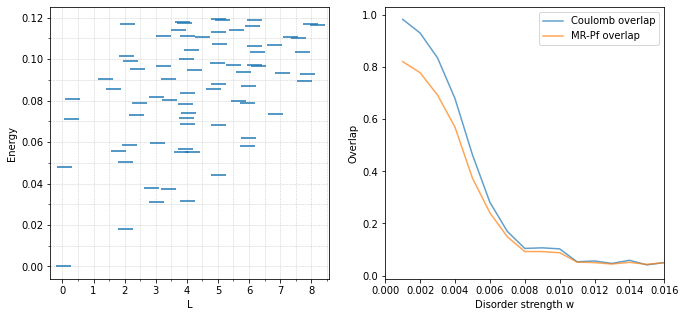

In [70]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

ax[0].plot(L, ene, ls="none", marker="_", ms="15", mew="1.5")

ax[0].set_xlabel("L")
ax[0].set_ylabel("Energy")

ax[1].set_xlabel("Disorder strength w")
ax[1].set_ylabel("Overlap")

ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))

ax[0].grid(which='major', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[0].grid(which='minor', color='black', linestyle='--', linewidth=0.5,alpha=0.2)

ax[1].plot(disorder_vals, coulomb_overlap, alpha=0.7,label="Coulomb overlap")
ax[1].plot(disorder_vals, trial_overlap,alpha=0.7,label="MR-Pf overlap")

ax[1].set_xlim(0,0.016)
ax[1].legend()


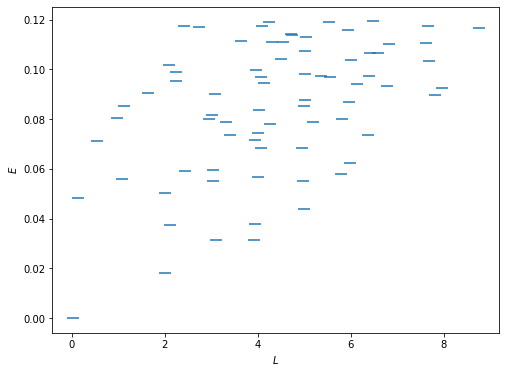

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9997543038937953


In [12]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.0001

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)

#np.save('N8_noise_spectrum.npy',(noise_energies,noise_eigenstates))

plot_L2_spectrum(hamil=noise_hamil,
                 L2=system.L2.A,
                 title='',
                 figsize=(8,6),sorted=True, 
                 lim=75)

noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

# Entanglement Spectrum

Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] ...
Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] ...


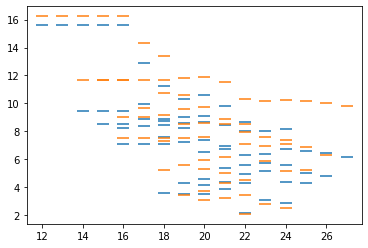

In [148]:
Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(Norb-8,Norb,dtype=int)
NA=int(4)
LzAvec = np.arange(12,28) #noninclusive endpoint 

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(trial_eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

ent_spec=system.entanglement_spectrum(eigenstates[:,0],subsystemA,NA,LzAvec)
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")


In [34]:
#plotting energetics for disordered hamiltonian

#disordered Hamiltonian
disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(disordered_ent_spec[:,0], disordered_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(eigenstates[:,0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

#trial Hamiltonian
trial_ent_spec=system.entanglement_spectrum(trial_eigenstates[0],subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(trial_ent_spec[:,0], trial_ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

Calculating entanglement spectrum for NA = 6, LzA = [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] ...


IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
def get_entanglement_entropy(eta):
   
   eta = np.real(eta)
   return sum(eta*np.exp(-eta))

In [55]:
print("Coulomb system EE:", get_entanglement_entropy(ent_spec[:,1]))
print("Disordered Coulomb system EE:", get_entanglement_entropy(disordered_ent_spec[:,1]))
print("Pfaffian State EE:", get_entanglement_entropy(trial_ent_spec[:,1]))

print("\nDelta S:", np.abs(get_entanglement_entropy(ent_spec[:,1])-get_entanglement_entropy(disordered_ent_spec[:,1])))

Coulomb system EE: 1.9426818750850436
Disordered Coulomb system EE: 2.5313586517200246
Pfaffian State EE: 1.961474617724587

Delta S: 0.588676776634981


### Calculating delta $S = S_{E} - S_{E,model}$

In [61]:
noise_strength = np.arange(0.,0.005,0.0005)
h_dimension = hamil.shape

def average(lst):
    return sum(lst) / len(lst)

delta_S = np.array([])
S_E = np.array([])
S_E_model=np.array([])

for width in noise_strength:
    S_E_val=[]
    S_E_model_val=[]

    print(f'Getting S_E for width {width}/{max(noise_strength)}')
    
    for i in range(0,0):
        noise_energies,noise_eigenstates = LA.eigh(hamil+np.random.normal(0,width,h_dimension),subset_by_index=[0,0])
        disordered_ent_spec=system.entanglement_spectrum(noise_eigenstates,subsystemA,NA,LzAvec)

        noise_trial_energies,noise_trial_eigenstates = LA.eigh(trial_hamil+np.random.normal(0,width,h_dimension),subset_by_index=[0,0])
        disordered_trial_ent_spec=system.entanglement_spectrum(noise_trial_eigenstates,subsystemA,NA,LzAvec)

        S_E_val.append(get_entanglement_entropy(disordered_ent_spec[:,1]))
        S_E_model_val.append(get_entanglement_entropy(disordered_trial_ent_spec[:,1]))

    S_E = np.append(S_E, average(S_E_val))
    S_E_model=np.append(S_E_model, average(S_E_model_val))

Getting S_E for width 0.0/0.0045000000000000005
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.] ...
Calculating entanglement spectrum for NA = 4, LzA = [16. 17. 18. 19. 20.

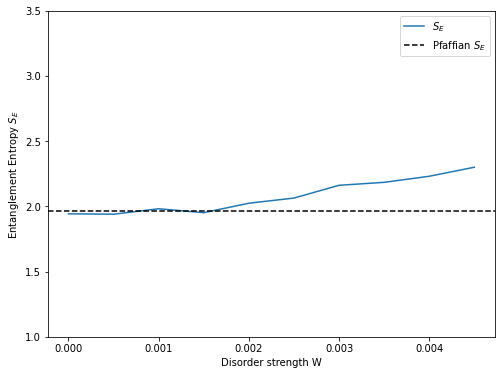

In [64]:
S_trial = get_entanglement_entropy(trial_ent_spec[:,1])

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength, S_E, label="$S_E$")
#plt.plot(noise_strength,S_E_model,label="$S_{E,model}$")

plt.ylim(1,3.5)
plt.axhline(S_trial,label='Pfaffian $S_E$',color='black',linestyle='--')
plt.xlabel('Disorder strength W')
plt.ylabel('Entanglement Entropy $S_E$')

plt.legend()

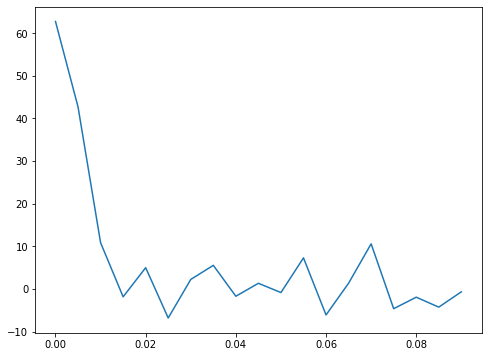

In [18]:
dx=noise_strength[1]-noise_strength[0]
dydx = np.diff(S_E)/dx

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength[0:len(noise_strength)-1], dydx, label="$S_E$")

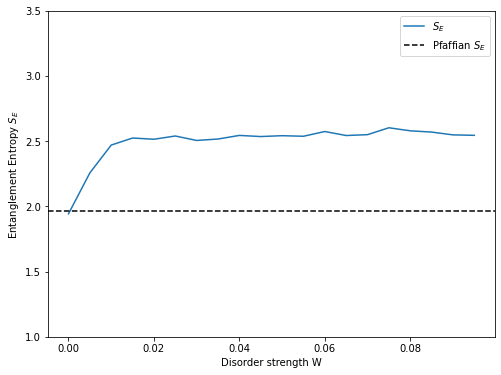

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(noise_strength, S_E, label="$S_E$")
#plt.plot(noise_strength,S_E_model,label="$S_{E,model}$")

plt.ylim(1,3.5)
plt.axhline(S_trial,label='Pfaffian $S_E$',color='black',linestyle='--')
plt.xlabel('Disorder strength W')
plt.ylabel('Entanglement Entropy $S_E$')

plt.legend()

In [20]:
S_E

array([1.94268188, 2.25617561, 2.46949202, 2.52361598, 2.51427231,
       2.53911263, 2.50497496, 2.51600299, 2.54357623, 2.53492131,
       2.54144819, 2.53711395, 2.57343749, 2.54282611, 2.54943667,
       2.60220344, 2.57893847, 2.56916717, 2.54773445, 2.5442473 ])

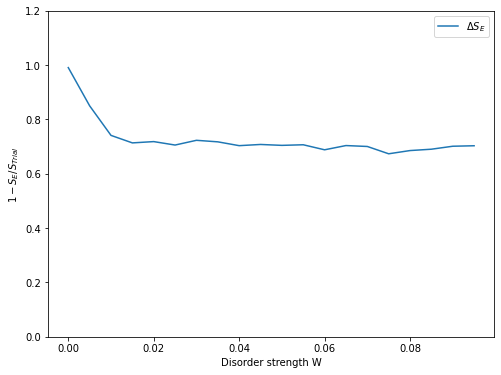

In [21]:
fig,ax=plt.subplots(figsize=(8,6))

plt.plot(noise_strength,1-np.abs(S_E-S_trial)/S_trial ,label="$\Delta S_E$")
plt.ylim(0,1.2)
plt.xlabel('Disorder strength W')
plt.ylabel('$1-S_E/S_{Trial}$')

plt.legend()

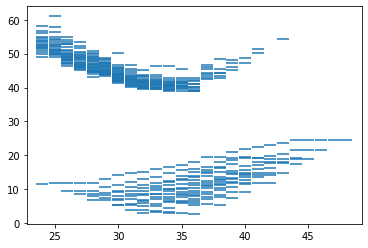

In [118]:
data=np.loadtxt('N10.csv',delimiter=',')
ax=plt.plot(data[:,0], data[:,1], ls="none", marker="_", ms="12", mew="1.5")
#plt.ylim(0,15)
#plt.xlim(25,40)

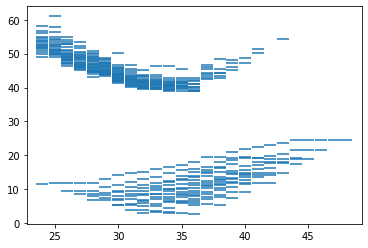

In [51]:
data=np.loadtxt('N12.csv',delimiter=',')
ax=plt.plot(data[:,0], data[:,1], ls="none", marker="_", ms="12", mew="1.5")
#plt.ylim(0,15)
#plt.xlim(25,40)

(35.0, 55.0)

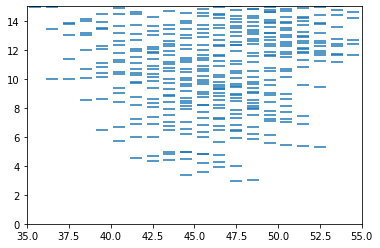

In [11]:
data=np.loadtxt('N14.csv',delimiter=',')
ax=plt.plot(data[:,0], data[:,1], ls="none", marker="_", ms="12", mew="1.5")
plt.ylim(0,15)
plt.xlim(35,55)

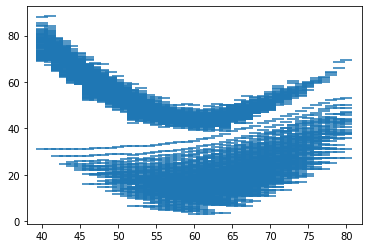

In [3]:
data=np.loadtxt('N16.csv',delimiter=',')
ax=plt.plot(data[:,0], data[:,1], ls="none", marker="_", ms="12", mew="1.5")
#plt.ylim(0,15)
#plt.xlim(45,70)